In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 7]

In [2]:
def get_df_for_log(log):
    df = pd.read_csv(log, index_col=0, delim_whitespace=True, names=["time", "RSS", "bytes_sent"])
    df.index = df.index / 1e9
    df['RSS'] /= 1024
    df['bytes_sent'] /= 1024*1024
    return df

In [19]:
def plot_old_vs_new(paths, labels, title_addition=''):
    fig, axes = plt.subplots(nrows=2, ncols=1)
    
    dfs = [get_df_for_log(path) for path in paths]
    
    for i,df in enumerate(dfs):
        df['RSS'].plot(ax=axes[0], label=labels[i])
        df['bytes_sent'].plot(ax=axes[1], label=labels[i])

    axes[0].legend(loc="upper left")
    axes[0].set_ylabel('RSS Memory (MiB)')
    axes[0].set_xlabel("")
    axes[1].set_xlabel("Time since start (s)")
    axes[1].set_ylabel('Data Sent (MiB)' if "up" in paths[0] else "Data Received (MiB)")
    axes[0].set_title(os.path.basename(paths[0]).replace("old_", "").replace("_default_settings", "") + title_addition)

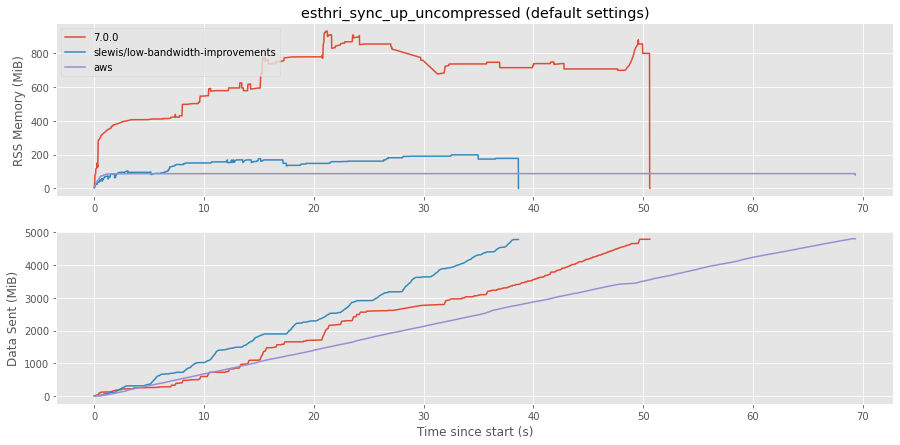

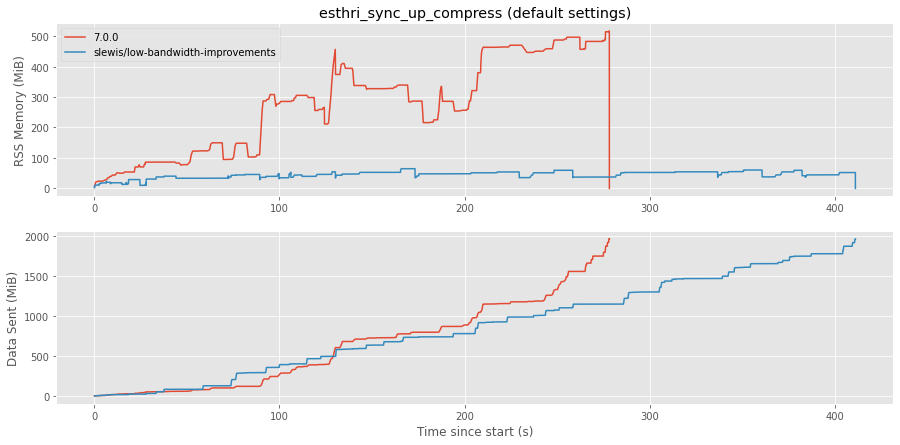

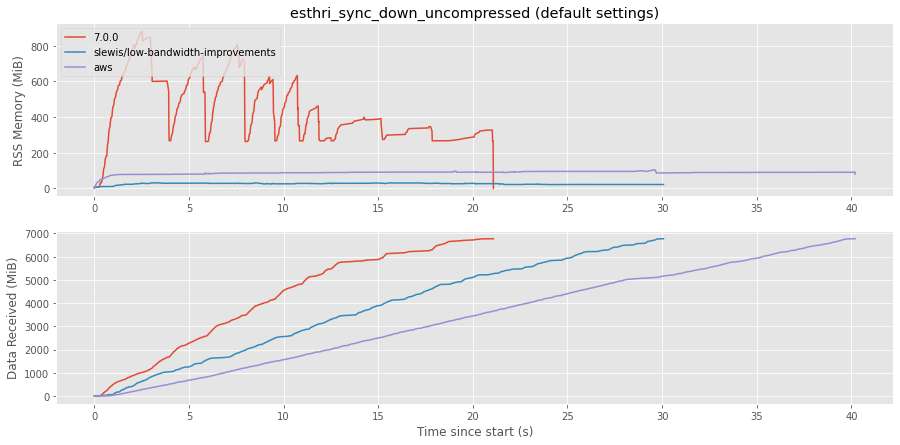

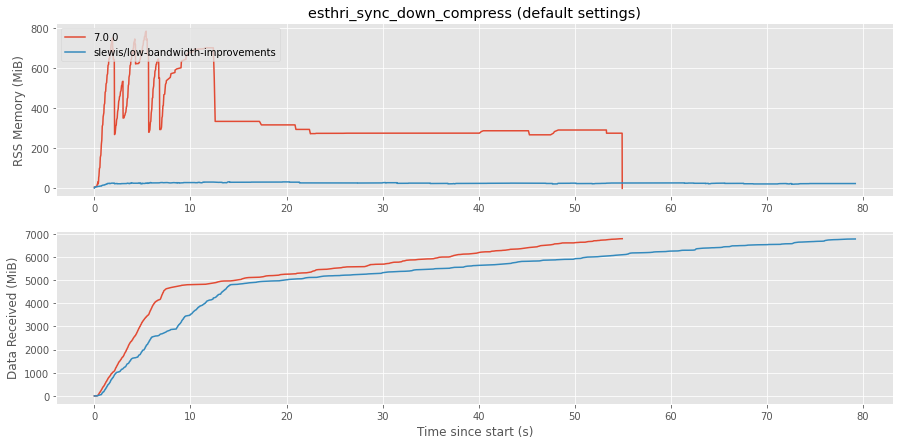

In [24]:
pairs = [
    ("results_1/esthri_old_sync_up_uncompressed_default_settings", "results_1/esthri_new_sync_up_uncompressed_default_settings", "aws_results/aws_aws_sync_up_uncompressed_default_settings"),
    ("results_1/esthri_old_sync_up_compress_default_settings", "results_1/esthri_new_sync_up_compress_default_settings"),
    ("results_1/esthri_old_sync_down_uncompressed_default_settings", "results_1/esthri_new_sync_down_uncompressed_default_settings", "aws_results/aws_aws_sync_down_uncompressed_default_settings"),
    ("results_1/esthri_old_sync_down_compress_default_settings", "results_1/esthri_new_sync_down_compress_default_settings"),
]

for pair in pairs:
    plot_old_vs_new(pair, ["7.0.0", "slewis/low-bandwidth-improvements", "aws"], title_addition=" (default settings)")


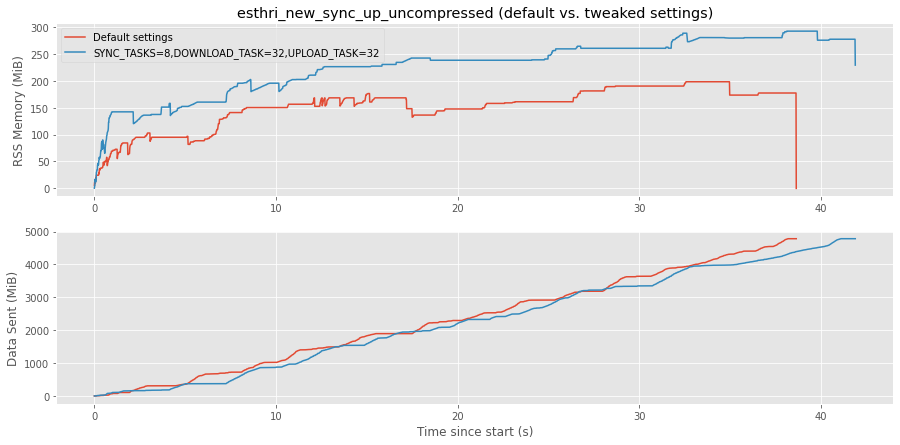

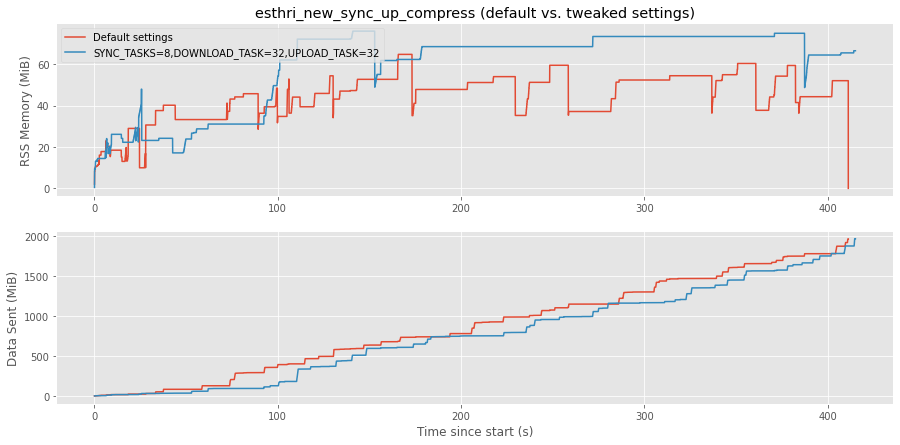

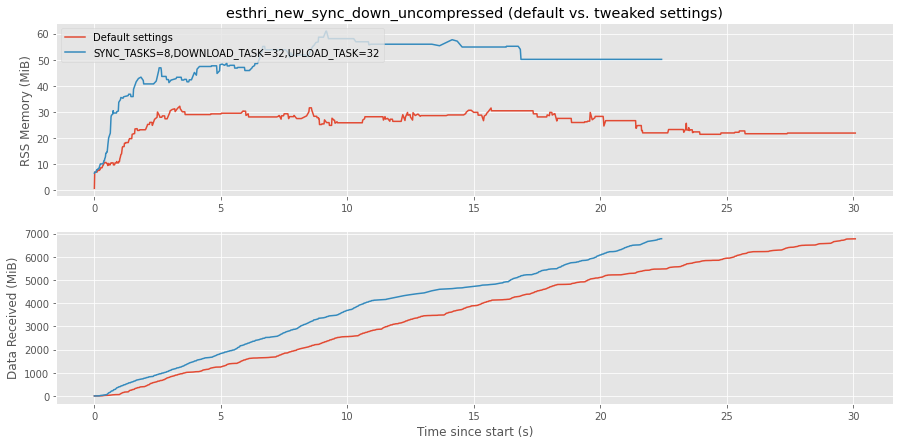

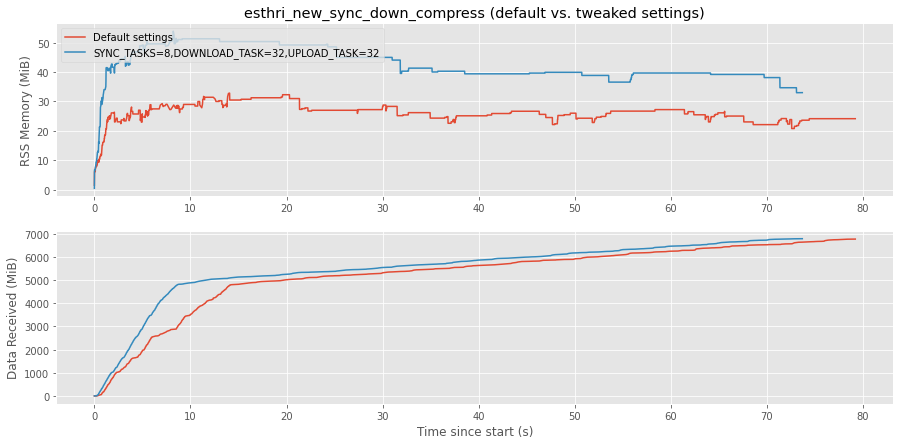

In [25]:
pairs = [
    ("results_1/esthri_new_sync_up_uncompressed_default_settings", "results_1/esthri_new_sync_up_uncompressed_new_settings"),
    ("results_1/esthri_new_sync_up_compress_default_settings", "results_1/esthri_new_sync_up_compress_new_settings"),
    ("results_1/esthri_new_sync_down_uncompressed_default_settings", "results_1/esthri_new_sync_down_uncompressed_new_settings"),
    ("results_1/esthri_new_sync_down_compress_default_settings", "results_1/esthri_new_sync_down_compress_new_settings"),
]

for pair in pairs:
    plot_old_vs_new(pair, ["Default settings", "SYNC_TASKS=8,DOWNLOAD_TASK=32,UPLOAD_TASK=32"], title_addition=" (default vs. tweaked settings)")


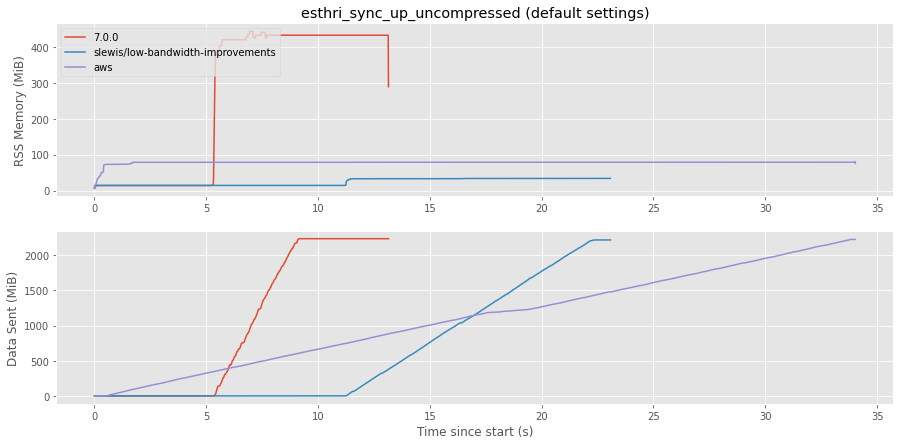

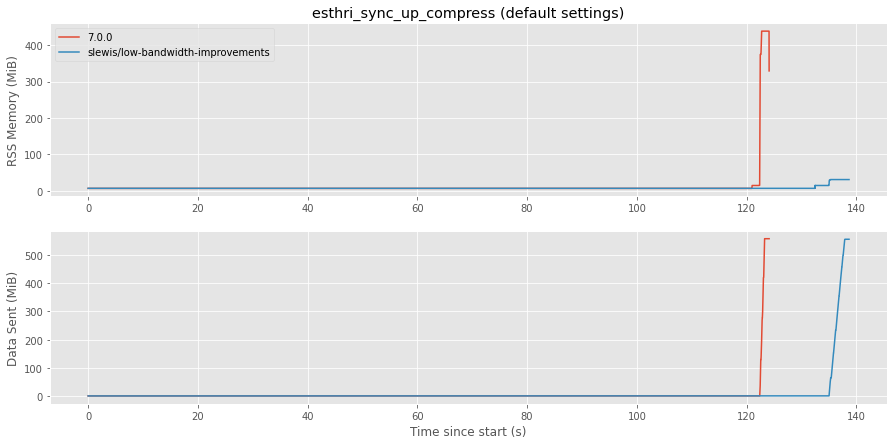

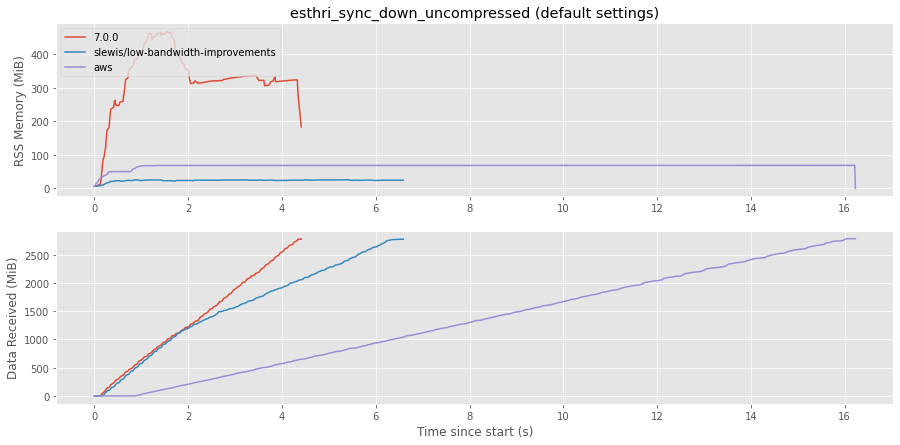

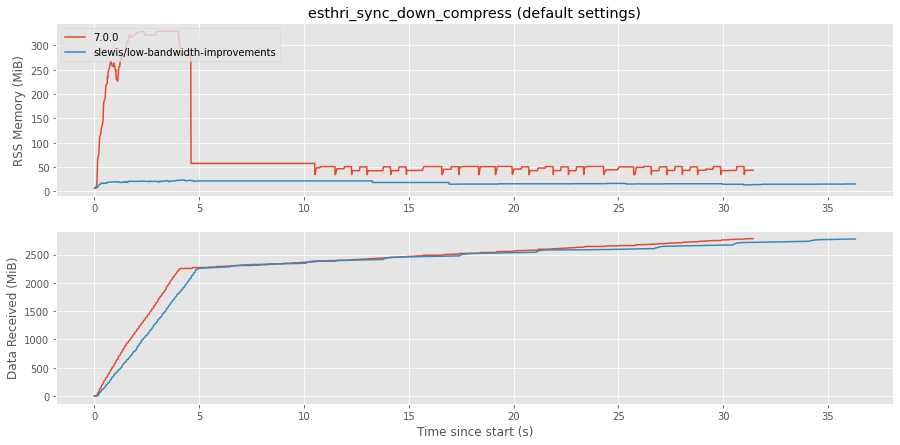

In [26]:
pairs = [
    ("2gb_file/esthri_old_sync_up_uncompressed_default_settings", "2gb_file/esthri_new_sync_up_uncompressed_default_settings", "2gb_file/aws_aws_sync_up_uncompressed_default_settings"),
    ("2gb_file/esthri_old_sync_up_compress_default_settings", "2gb_file/esthri_new_sync_up_compress_default_settings"),
    ("2gb_file/esthri_old_sync_down_uncompressed_default_settings", "2gb_file/esthri_new_sync_down_uncompressed_default_settings", "2gb_file/aws_aws_sync_down_uncompressed_default_settings"),
    ("2gb_file/esthri_old_sync_down_compress_default_settings", "2gb_file/esthri_new_sync_down_compress_default_settings"),
]

for pair in pairs:
    plot_old_vs_new(pair, ["7.0.0", "slewis/low-bandwidth-improvements", "aws"], title_addition=" (default settings)")


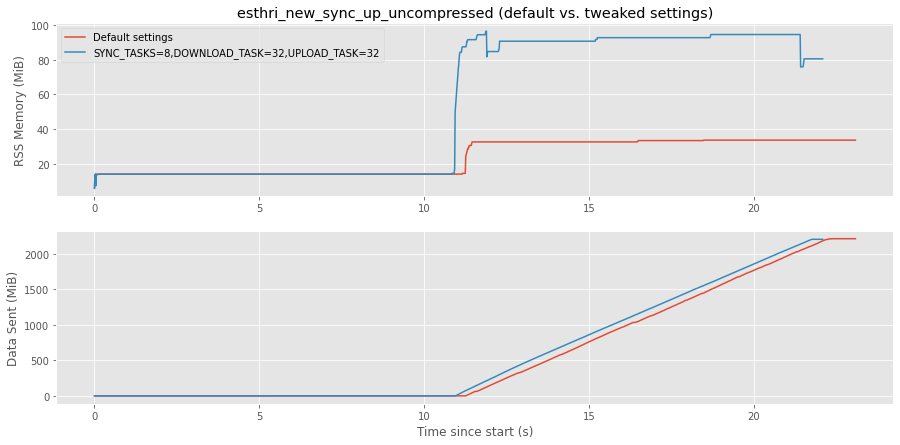

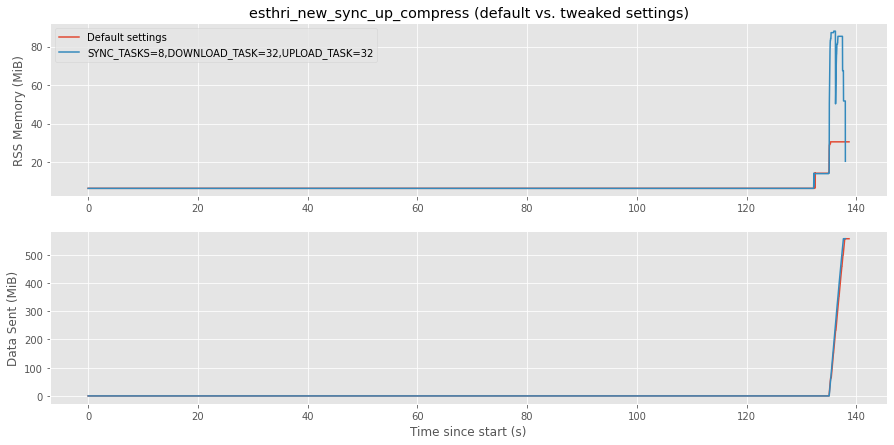

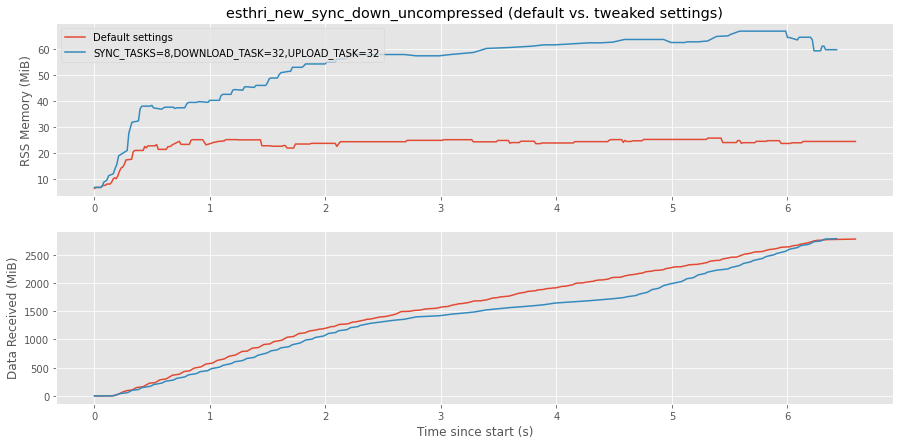

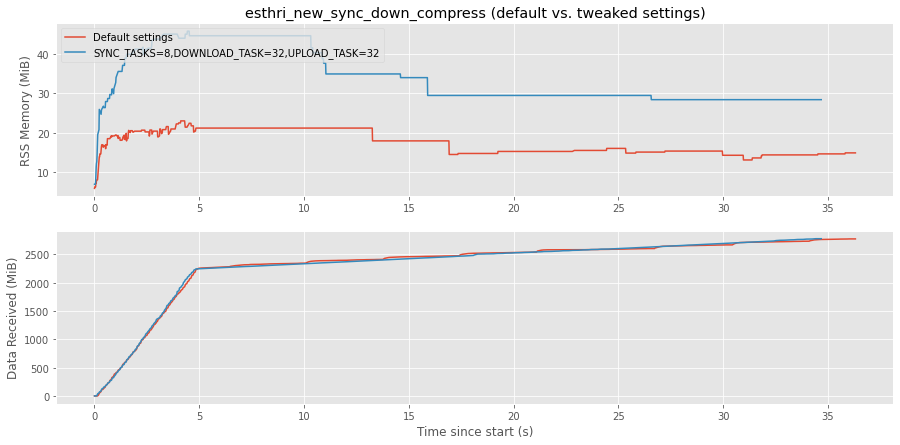

In [28]:
pairs = [
    ("2gb_file/esthri_new_sync_up_uncompressed_default_settings", "2gb_file/esthri_new_sync_up_uncompressed_new_settings"),
    ("2gb_file/esthri_new_sync_up_compress_default_settings", "2gb_file/esthri_new_sync_up_compress_new_settings"),
    ("2gb_file/esthri_new_sync_down_uncompressed_default_settings", "2gb_file/esthri_new_sync_down_uncompressed_new_settings"),
    ("2gb_file/esthri_new_sync_down_compress_default_settings", "2gb_file/esthri_new_sync_down_compress_new_settings"),
]

for pair in pairs:
    plot_old_vs_new(pair, ["Default settings", "SYNC_TASKS=8,DOWNLOAD_TASK=32,UPLOAD_TASK=32"], title_addition=" (default vs. tweaked settings)")
